### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load the cleaned dataset
data = pd.read_csv("cleaned_dataset.csv")

In [3]:
# 1. Basic Dataset Overview
print("=== DATASET OVERVIEW ===")
print(f"Shape: {data.shape[0]:,} samples × {data.shape[1]} features")
print("\nData types:")
print(data.dtypes.value_counts())
print("\nFirst 5 rows:")
print(data.head())

=== DATASET OVERVIEW ===
Shape: 279 samples × 55 features

Data types:
float64    54
int64       1
Name: count, dtype: int64

First 5 rows:
        AFP        AG       Age       ALB       ALP       ALT       AST  \
0  0.270526 -0.670326 -0.019001 -0.345235 -1.094850 -0.183006 -0.231570   
1 -2.229110  0.360487 -1.174380 -1.603386 -0.540664 -0.714866 -1.146372   
2 -0.652716 -1.515640 -0.426782  0.679260 -0.199626 -0.980796 -0.688971   
3 -0.399450  0.228994 -0.086964 -0.039684 -0.753812 -0.183006 -0.345920   
4 -0.468841  1.626110  1.204342 -0.183472  0.098782 -0.360292 -0.574620   

      BASO#     BASO%       BUN  ...      TBIL        TP        UA  \
0  0.968747  0.737988  0.898509  ...  0.510522 -0.759171 -0.403594   
1  0.047860 -0.218241 -0.014473  ... -1.474644 -0.788144 -0.836820   
2 -0.873028 -0.780728  0.237896  ... -0.168614 -0.397006 -0.831248   
3  1.889634  3.241056  2.806121  ... -0.377579 -0.049327 -0.214144   
4 -1.333471 -1.343216  1.054384  ... -0.011890  0.225918 -0


=== TARGET DISTRIBUTION ===
TYPE
1    142
0    137
Name: count, dtype: int64

Class imbalance ratio: 1.04:1


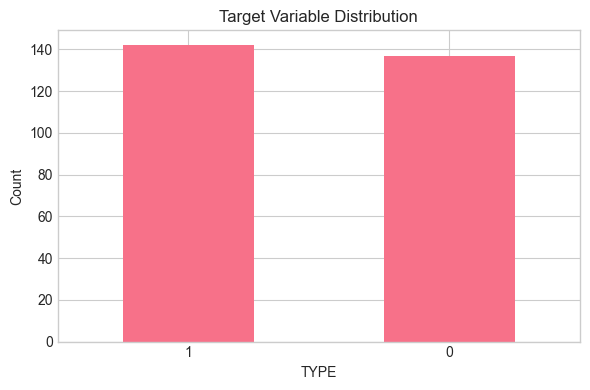

In [4]:
# 2. Target Variable Analysis (assuming 'TYPE' is the target)
print("\n=== TARGET DISTRIBUTION ===")
if 'TYPE' in data.columns:
    target_counts = data['TYPE'].value_counts()
    print(target_counts)
    print(f"\nClass imbalance ratio: {target_counts.max() / target_counts.min():.2f}:1")
    
    # Visualize target distribution
    plt.figure(figsize=(6, 4))
    target_counts.plot(kind='bar')
    plt.title("Target Variable Distribution")
    plt.xlabel("TYPE")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [5]:
# 3. Missing Values Check
print("\n=== MISSING VALUES ===")
missing_summary = data.isnull().sum()
if missing_summary.sum() > 0:
    print(missing_summary[missing_summary > 0])
else:
    print("No missing values detected.")


=== MISSING VALUES ===
No missing values detected.


In [6]:
# 4. Numeric Features Summary
print("\n=== NUMERIC FEATURES SUMMARY ===")
data.describe().T


=== NUMERIC FEATURES SUMMARY ===


,count,mean,std,min,25%,50%,75%,max
AFP,279.0,-9.391134e-16,1.001797,-2.602271,-0.568741,0.070077,0.619501,4.429329
AG,279.0,5.093496e-17,1.001797,-3.112344,-0.490697,0.128026,0.628170,3.258035
Age,279.0,-1.400711e-16,1.001797,-2.057906,-0.800581,-0.019001,0.796561,2.563613
ALB,279.0,-2.578583e-16,1.001797,-3.436691,-0.480036,0.211947,0.688247,1.865517
ALP,279.0,1.289291e-16,1.001797,-1.094850,-0.370145,-0.135682,0.205356,14.614195
ALT,279.0,-1.400711e-16,1.001797,-1.246726,-0.626222,-0.271649,0.260211,6.022028
AST,279.0,5.730183e-17,1.001797,-1.375072,-0.688971,-0.231570,0.340182,6.743797
BASO#,279.0,2.717858e-16,1.001797,-1.333471,-0.873028,-0.412584,0.508303,4.191853
BASO%,279.0,6.366870e-18,1.001797,-1.343216,-0.780728,-0.218241,0.625490,4.112912
BUN,279.0,3.947460e-16,1.001797,-2.181876,-0.660240,-0.133235,0.575625,4.550435


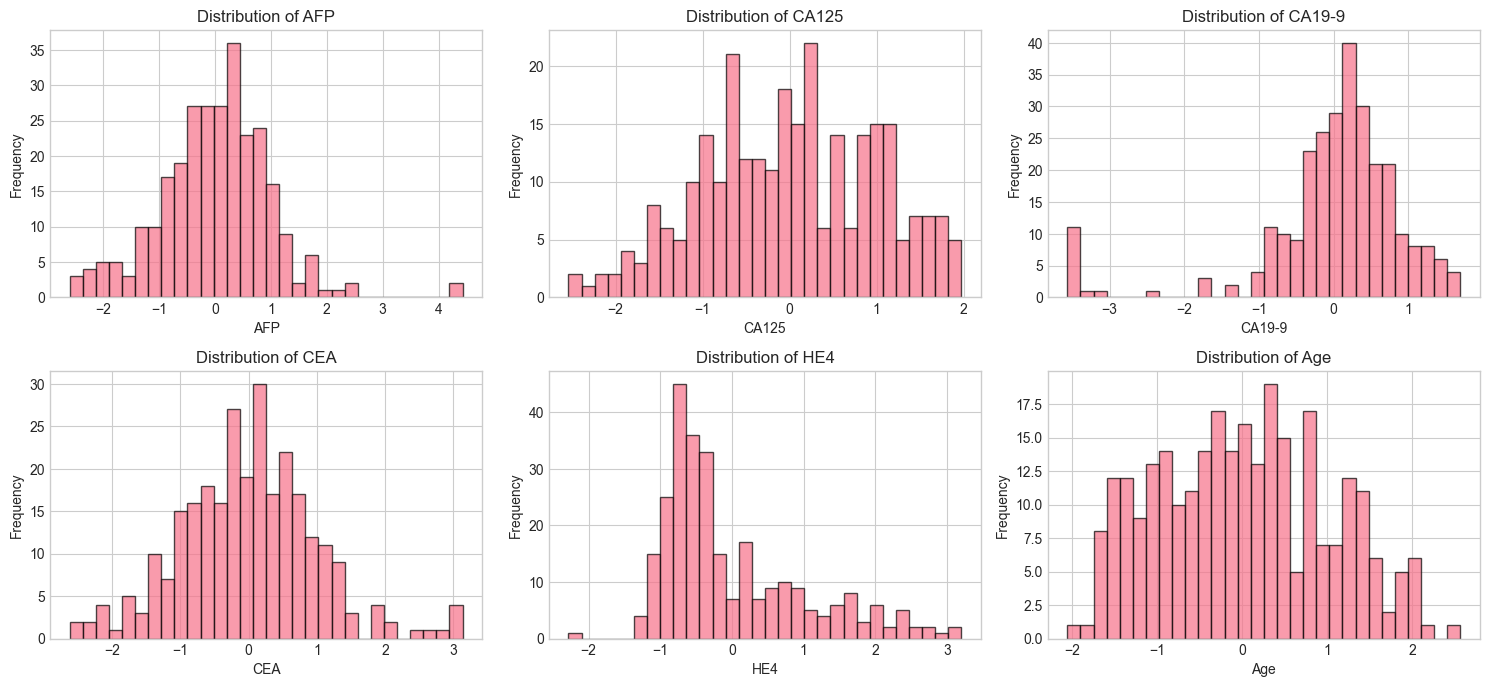

In [7]:
# Key biomarker columns for focused analysis (adjust as needed)
key_biomarkers = ['AFP', 'CA125', 'CA19-9', 'CEA', 'HE4', 'CA72-4', 'Age']  # Example; extend with domain knowledge
available_biomarkers = [col for col in key_biomarkers if col in data.columns]

# Histograms for key biomarkers
plt.figure(figsize=(15, 10))
for i, col in enumerate(available_biomarkers, 1):
    plt.subplot(3, 3, i)
    data[col].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

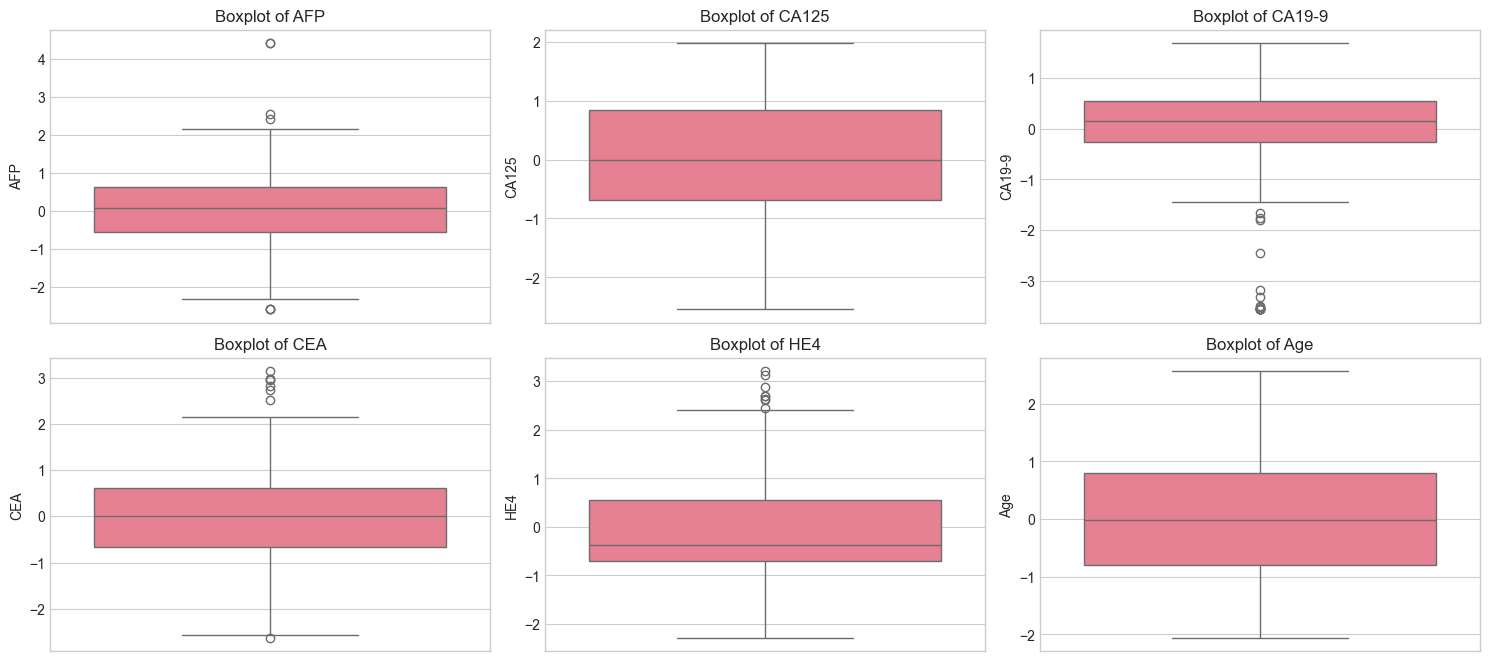

In [8]:
# Boxplots for outliers in key biomarkers
plt.figure(figsize=(15, 10))
for i, col in enumerate(available_biomarkers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


=== CORRELATION ANALYSIS ===


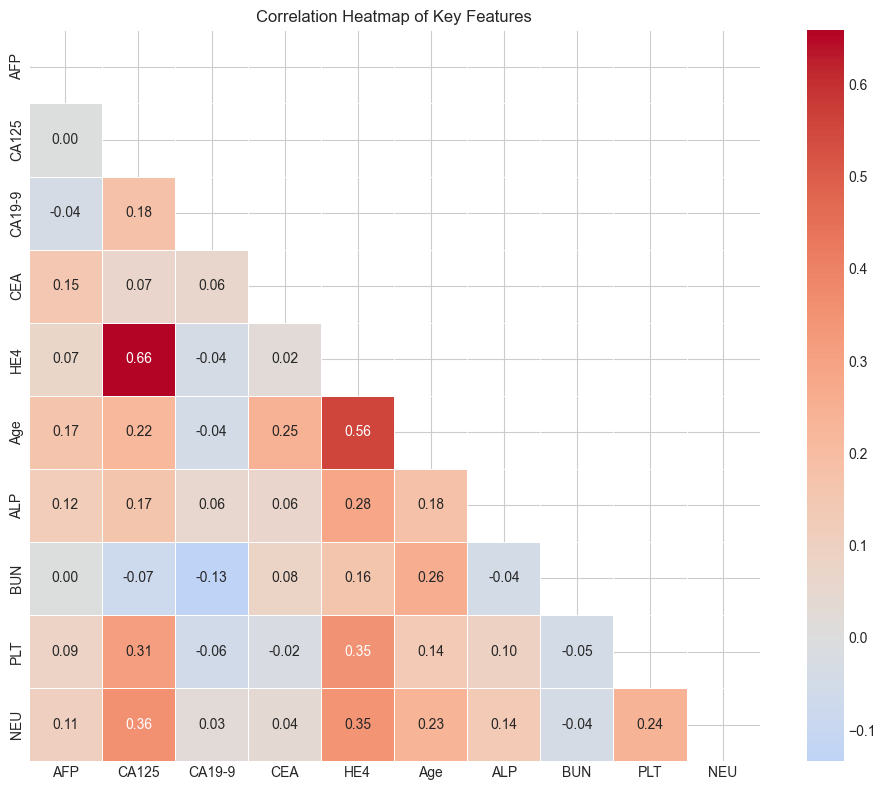

In [9]:
# 5. Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")
# Select numeric columns for correlation (limit to avoid clutter; focus on key ones)
corr_cols = available_biomarkers + ['ALP', 'BUN', 'PLT', 'NEU']  # Example expansion
corr_cols = [col for col in corr_cols if col in data.columns]
if len(corr_cols) > 1:
    corr_matrix = data[corr_cols].corr()
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', center=0,
                square=True, linewidths=0.5)
    plt.title("Correlation Heatmap of Key Features")
    plt.tight_layout()
    plt.show()
    
    # High correlations (>0.7)
    high_corr = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                 if i != j and abs(corr_matrix.loc[i, j]) > 0.7]
    if high_corr:
        print("High correlations (|r| > 0.7):")
        for pair in high_corr:
            print(f"{pair[0]} - {pair[1]}: {corr_matrix.loc[pair[0], pair[1]]:.3f}")

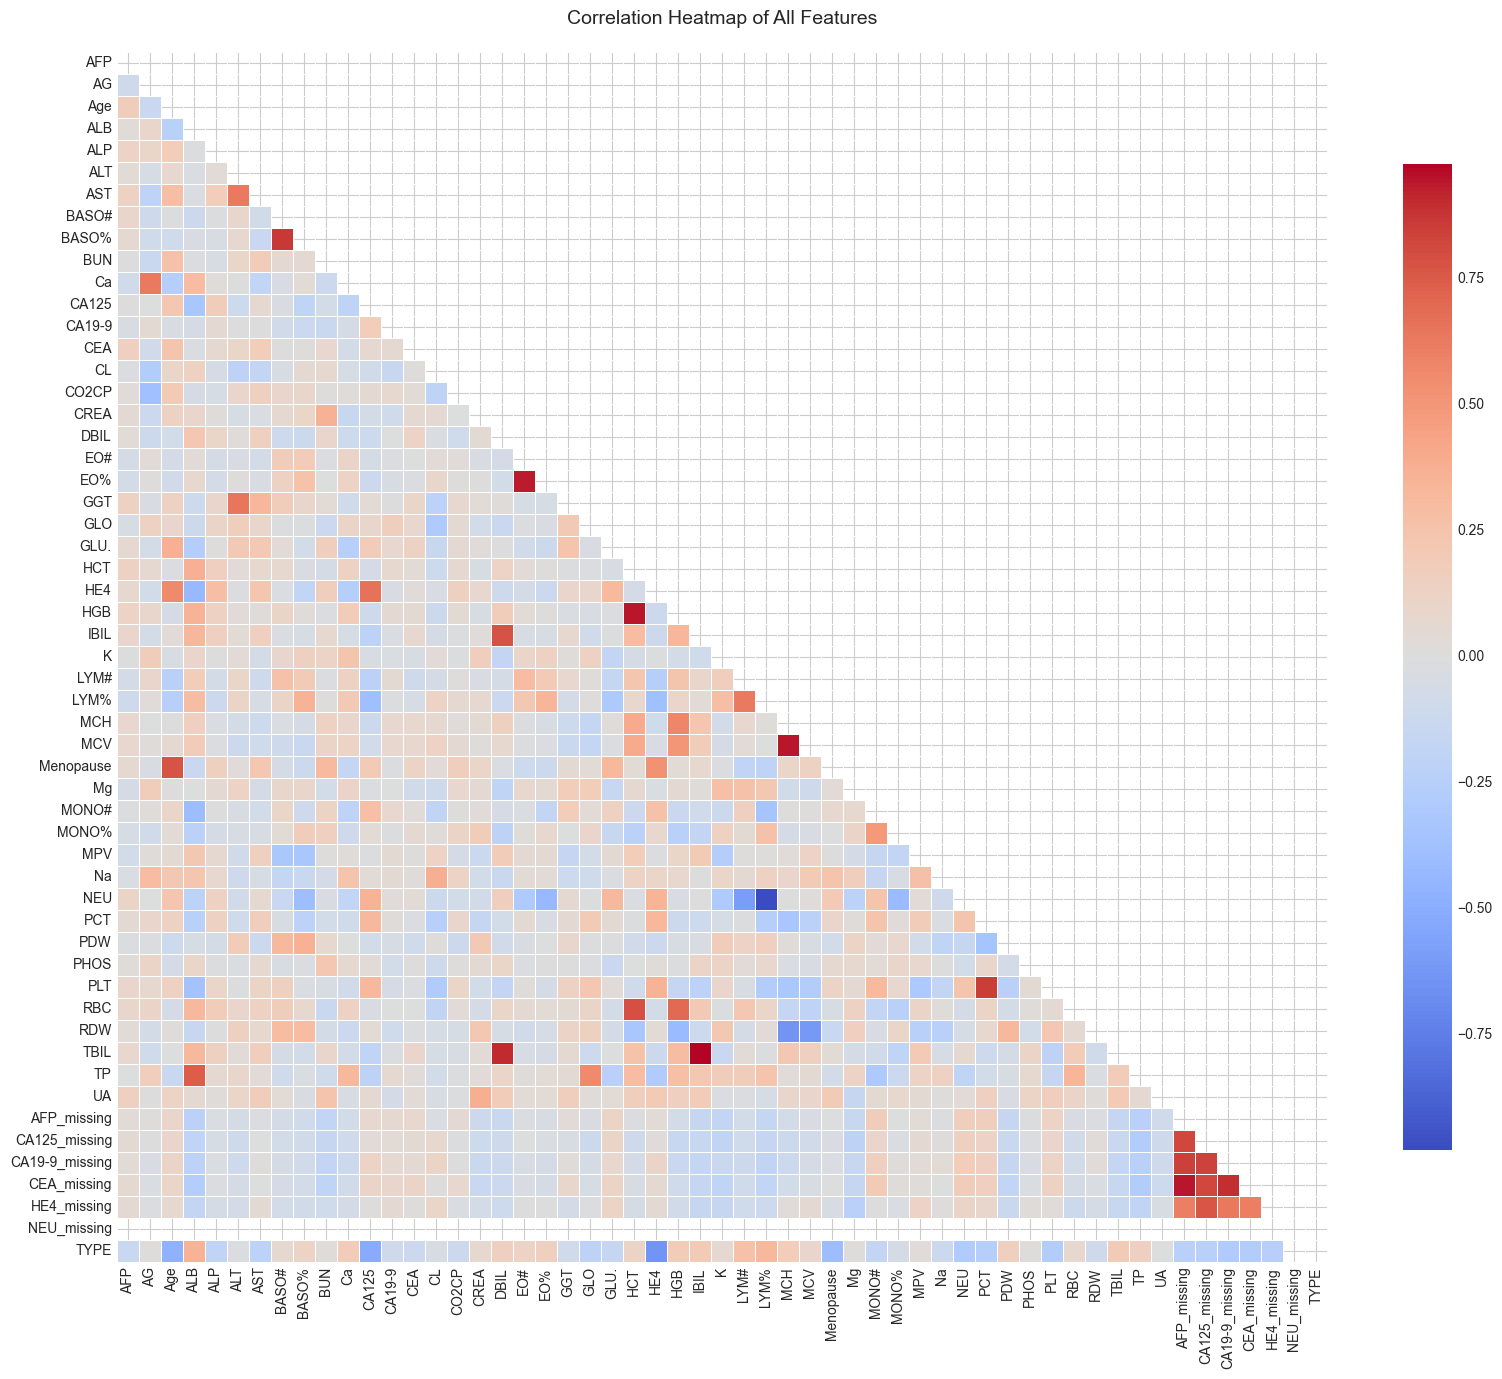


High correlations (|r| > 0.7):
Age - Menopause: 0.775
ALB - TP: 0.743
BASO# - BASO%: 0.866
DBIL - IBIL: 0.776
DBIL - TBIL: 0.898
EO# - EO%: 0.929
HCT - HGB: 0.943
HCT - RBC: 0.790
IBIL - TBIL: 0.974
LYM% - NEU: -0.980
MCH - MCV: 0.937
PCT - PLT: 0.845
AFP_missing - CA125_missing: 0.819
AFP_missing - CA19-9_missing: 0.840
AFP_missing - CEA_missing: 0.944
CA125_missing - CA19-9_missing: 0.835
CA125_missing - CEA_missing: 0.819
CA125_missing - HE4_missing: 0.761
CA19-9_missing - CEA_missing: 0.894


In [10]:
# Compute correlation matrix (all features are numeric)
corr_matrix = data.corr()

# Plot correlation heatmap (upper triangle masked for clarity)
plt.figure(figsize=(max(12, data.shape[1] * 0.3), max(10, data.shape[1] * 0.25)))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=False,  # Disable for large matrices; set True for subsets
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of All Features", fontsize=14, pad=20)
plt.tight_layout()

# Save the plot
plt.savefig("correlation_heatmap_all_features.png", dpi=300, bbox_inches='tight')
plt.show()

# Identify high correlations (|r| > 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

if high_corr_pairs:
    print("\nHigh correlations (|r| > 0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("\nNo high correlations (|r| > 0.7) found.")

In [11]:
# 6. Categorical Features (if any beyond target)
print("\n=== CATEGORICAL FEATURES ===")
cat_cols = data.select_dtypes(include=['object', 'category']).columns.drop('TYPE', errors='ignore')
if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"\n{col} value counts:")
        print(data[col].value_counts())
        
        # Bar plot
        plt.figure(figsize=(8, 4))
        data[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No additional categorical features found.")


=== CATEGORICAL FEATURES ===
No additional categorical features found.


In [12]:
# 7. Statistical Tests (e.g., normality for key features)
print("\n=== NORMALITY TESTS (Shapiro-Wilk for key biomarkers) ===")
for col in available_biomarkers[:5]:  # Limit to first 5 for brevity
    if data[col].notna().sum() > 3:  # Need >3 for test
        stat, p = stats.shapiro(data[col].sample(min(5000, len(data))))  # Sample if large
        print(f"{col}: W={stat:.3f}, p={p:.3f} {'(non-normal)' if p < 0.05 else '(normal)'}")

print("\nEDA complete. Review plots and summaries for insights.")



=== NORMALITY TESTS (Shapiro-Wilk for key biomarkers) ===
AFP: W=0.969, p=0.000 (non-normal)
CA125: W=0.987, p=0.012 (non-normal)
CA19-9: W=0.816, p=0.000 (non-normal)
CEA: W=0.986, p=0.007 (non-normal)
HE4: W=0.876, p=0.000 (non-normal)

EDA complete. Review plots and summaries for insights.
